# Midterm Presentation: Oxnard and Sites of Toxic Releases

In [1]:
#general data wrangling tasks
import pandas as pd

#read and visualize spatial data
import geopandas as gpd

#providing basemaps
import contextily as ctx

#give power to plots
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Plot Map of Toxic Release Facilities

In [2]:
#name dataset as pd and read/show dataset
dfox=pd.read_csv('updatedoxnard_trisummary2020 - Sheet1-5.csv')

In [3]:

# convert df to gdf
gdfox = gpd.GeoDataFrame(dfox, crs='epsg:4326', geometry=gpd.points_from_xy(dfox.Longitude, dfox.Latitude)) 
#geometry put the longitude and latitide points together in new column as object types
gdfox

,Longitude,Latitude,Name,Address,Industry Sector,Releases (lb),Releases (lb) Mean,geometry
0,-119.183020,34.140350,New-Indy Oxnard LLC,"5936 Perkins Road, Oxnard, CA 93033",Paper,"10,001-100,000",55000.5,POINT (-119.18302 34.14035)
1,-119.168445,34.141707,Aluminum Precision Products INC,"1001 MC Wane Bouvelard, Oxnard, CA 93033",Fabricated Metals,"101-10,000",5050.5,POINT (-119.16845 34.14171)
2,-119.168110,34.196130,Cemex Oxnard Plant,"548 Diaz Avenue, Oxnard, CA 93030",Nonmetallic Mineral Product,0.00,0.0,POINT (-119.16811 34.19613)
3,-119.147180,34.198100,Parker Hannifin Corp,"2340 Eastman Ave, Oxnard, CA 93030",Machinery,"10,001-100,000",55000.5,POINT (-119.14718 34.19810)
4,-119.130352,34.205928,PTI Technologies Inc,"501 N Del Norte Boulevard, Oxnard, CA 93030",Transportation Equipment,"101-10,000",5050.5,POINT (-119.13035 34.20593)
5,-119.140427,34.209468,The Procter & Gamble Paper Product CO,"800 N Rice Avenue, Oxnard, CA 93030",Paper,"101-10,000",5050.5,POINT (-119.14043 34.20947)
6,-119.163291,34.249140,Southern Counties Oil CO LP DBA SC Fuels,"3815 East Vineyard Avenue, Oxnard, CA 93036",Petroleum Bulk Terminals,"101-10,000",5050.5,POINT (-119.16329 34.24914)
7,-119.129346,34.199354,Associated Ready Mixed Concrete Inc,"392 S. Del Norte Boulevard, Oxnard, CA 93030",Nonmetallic Mineral Product,0.00,0.0,POINT (-119.12935 34.19935)
8,-119.143053,34.270536,Vulcan Materials-Saticoy,"6029 Vineyard Avenue, Oxnard, CA 93030",Petroleum,>0-100,50.0,POINT (-119.14305 34.27054)


Text(0.5, 1.0, 'Plot of Oxnard, CA TRI Facilities in 2020')

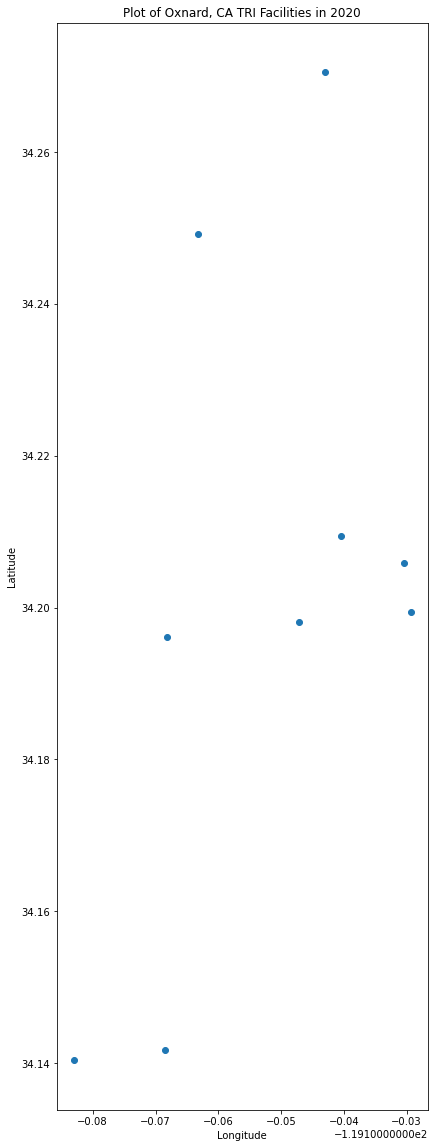

In [4]:
gdfox.plot(figsize=(30, 20))
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Plot of Oxnard, CA TRI Facilities in 2020')

## Chart Difference in Waste Release per Facility in Oxnard, CA

In [5]:
newdata=dfox.drop(['Longitude','Latitude', 'Address', 'Industry Sector', 'Releases (lb)', 'geometry'], axis = 1)
#name new dataframe with name as index and not as"0,1,2.."
dfoxx=newdata.set_index("Name")
dfoxx
#Releases (lb) Mean labels
#10,001-100,000lb=55,000.5lb
#101-10,000lb=5,050.5lb
#>0-100lb=50lb
#0lb=0lb

,Releases (lb) Mean
Name,
New-Indy Oxnard LLC,55000.5
Aluminum Precision Products INC,5050.5
Cemex Oxnard Plant,0.0
Parker Hannifin Corp,55000.5
PTI Technologies Inc,5050.5
The Procter & Gamble Paper Product CO,5050.5
Southern Counties Oil CO LP DBA SC Fuels,5050.5
Associated Ready Mixed Concrete Inc,0.0
Vulcan Materials-Saticoy,50.0


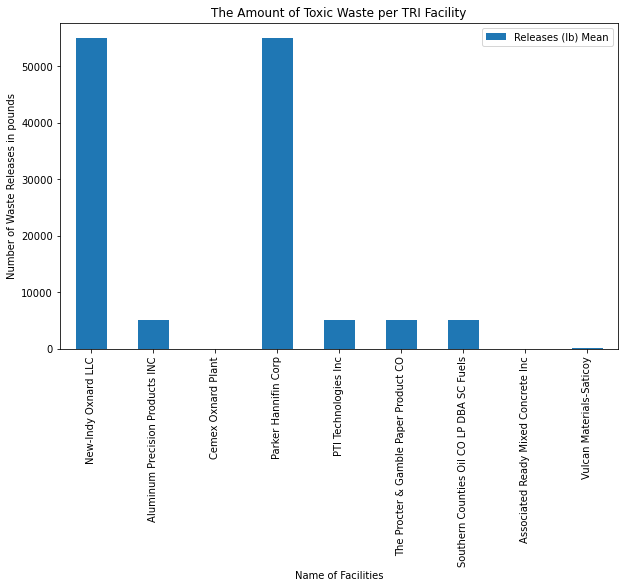

In [6]:
#querying data
#newdata=dfoxx.loc[['Name'], ['Releases(lb)']]
#plot dataframe with edits as bar graph
#dfoxx['Releases (lb) Mean']=dfoxx['Releases (lb) Mean'].astype(float)
dfoxx.plot(figsize=(10, 6), kind='bar')
#customize graph features to add x and y labels, title, and position graph legend
plt.ylabel('Number of Waste Releases in pounds')
plt.xlabel('Name of Facilities')
plt.title('The Amount of Toxic Waste per TRI Facility')
plt.legend(loc='upper right')
#display customized graph
plt.show()
#this bar graph shows that surveyed White people own  more units than surveyed Black and Asian people

## Map of Population Race in Oxnard, CA and Malibu, CA

In [7]:
#providing basemaps
import contextily as ctx

In [8]:
#loading geojson file
gdfox=gpd.read_file('oxnardcensus.geojson')
gdfma=gpd.read_file('malibucensus.geojson')

<AxesSubplot:>

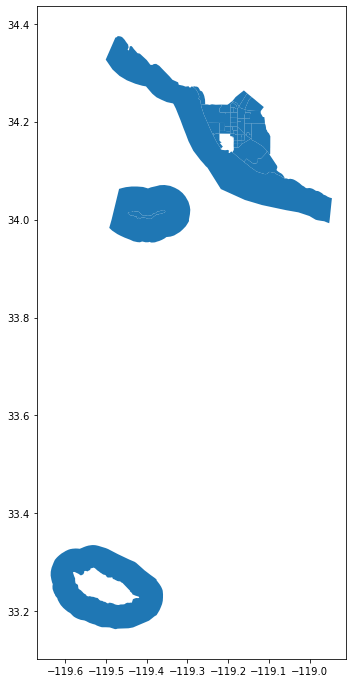

In [9]:
#plot data
gdfox.plot(figsize=(12,12))

<AxesSubplot:>

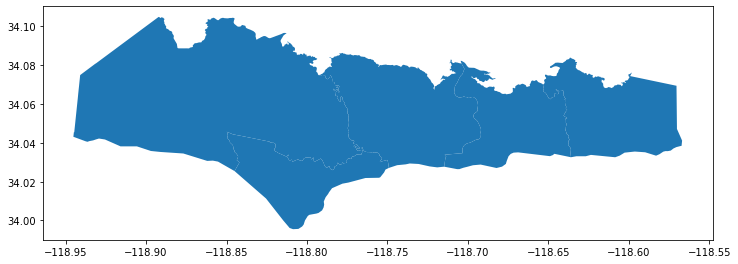

In [10]:
#plot data
gdfma.plot(figsize=(12,12))

In [11]:
# columns to keep
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [12]:
# redefine gdf with only columns to keep
gdfox = gdfox[columns_to_keep]
# redefine gdf with only columns to keep
gdfma = gdfma[columns_to_keep]

In [13]:
#rename column headers with race
gdfox.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [14]:
gdfox

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
0,14000US06111002500,"Census Tract 25, Ventura, CA",5374.0,4419.0,4014.0,44.0,97.0,142.0,0.0,0.0,122.0,955.0,"MULTIPOLYGON (((-119.28488 34.27208, -119.2847..."
1,14000US06111002901,"Census Tract 29.01, Ventura, CA",5665.0,2747.0,1538.0,196.0,0.0,679.0,9.0,0.0,325.0,2918.0,"MULTIPOLYGON (((-119.22113 34.22552, -119.2210..."
2,14000US06111002905,"Census Tract 29.05, Ventura, CA",5433.0,2339.0,1110.0,450.0,0.0,587.0,0.0,10.0,182.0,3094.0,"MULTIPOLYGON (((-119.26689 34.23456, -119.2654..."
3,14000US06111003010,"Census Tract 30.10, Ventura, CA",3226.0,805.0,445.0,82.0,1.0,255.0,4.0,0.0,18.0,2421.0,"MULTIPOLYGON (((-119.18629 34.22030, -119.1862..."
4,14000US06111003011,"Census Tract 30.11, Ventura, CA",5539.0,1004.0,612.0,65.0,0.0,260.0,9.0,0.0,58.0,4535.0,"MULTIPOLYGON (((-119.19458 34.22066, -119.1945..."
5,14000US06111003012,"Census Tract 30.12, Ventura, CA",675.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,662.0,"MULTIPOLYGON (((-119.19133 34.24133, -119.1907..."
6,14000US06111003013,"Census Tract 30.13, Ventura, CA",5509.0,1934.0,1188.0,230.0,0.0,310.0,10.0,24.0,172.0,3575.0,"MULTIPOLYGON (((-119.19446 34.22956, -119.1944..."
7,14000US06111003100,"Census Tract 31, Ventura, CA",14299.0,5059.0,2093.0,319.0,94.0,2278.0,92.0,0.0,183.0,9240.0,"MULTIPOLYGON (((-119.17739 34.22648, -119.1771..."
8,14000US06111003201,"Census Tract 32.01, Ventura, CA",4230.0,103.0,32.0,7.0,22.0,15.0,0.0,0.0,27.0,4127.0,"MULTIPOLYGON (((-119.17733 34.20163, -119.1773..."
9,14000US06111003300,"Census Tract 33, Ventura, CA",8956.0,1942.0,1523.0,88.0,19.0,121.0,0.0,0.0,191.0,7014.0,"MULTIPOLYGON (((-119.19467 34.20925, -119.1946..."


In [15]:
#rename column headers with race
gdfma.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [16]:
gdfma

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
0,14000US06037800406,"Census Tract 8004.06, Los Angeles, CA",2529.0,2174.0,1766.0,95.0,15.0,88.0,0.0,0.0,210.0,355.0,"MULTIPOLYGON (((-118.94508 34.04382, -118.9449..."
1,14000US06037800408,"Census Tract 8004.08, Los Angeles, CA",7274.0,6438.0,6017.0,21.0,0.0,78.0,0.0,0.0,322.0,836.0,"MULTIPOLYGON (((-118.84991 34.04568, -118.8463..."
2,14000US06037800410,"Census Tract 8004.10, Los Angeles, CA",4031.0,3423.0,2411.0,177.0,23.0,591.0,9.0,0.0,212.0,608.0,"MULTIPOLYGON (((-118.79213 34.07498, -118.7919..."
3,14000US06037800504,"Census Tract 8005.04, Los Angeles, CA",2334.0,2240.0,2004.0,60.0,0.0,106.0,27.0,0.0,43.0,94.0,"MULTIPOLYGON (((-118.71425 34.03070, -118.7141..."
4,14000US06037800506,"Census Tract 8005.06, Los Angeles, CA",3270.0,3089.0,2670.0,47.0,0.0,243.0,0.0,0.0,129.0,181.0,"MULTIPOLYGON (((-118.65342 34.07002, -118.6531..."


In [17]:
#add percent columns for each race
gdfox['Percent Non Hispanic White'] = gdfox['Non Hispanic White']/gdfox['Total']*100
gdfox['Percent Non Hispanic Black'] = gdfox['Non Hispanic Black']/gdfox['Total']*100
gdfox['Percent Non Hispanic American Indian and Alaska Native'] = gdfox['Non Hispanic American Indian and Alaska Native']/gdfox['Total']*100
gdfox['Percent Non Hispanic Asian'] = gdfox['Non Hispanic Asian']/gdfox['Total']*100
gdfox['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = gdfox['Non Hispanic Native Hawaiian and Other Pacific Islander']/gdfox['Total']*100
gdfox['Percent Non Hispanic Some other race'] = gdfox['Non Hispanic Some other race']/gdfox['Total']*100
gdfox['Percent Non Hispanic Two or more races'] = gdfox['Non Hispanic Two or more races']/gdfox['Total']*100

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [18]:
#add percent columns for each race
gdfma['Percent Non Hispanic White'] = gdfma['Non Hispanic White']/gdfma['Total']*100
gdfma['Percent Non Hispanic Black'] = gdfma['Non Hispanic Black']/gdfma['Total']*100
gdfma['Percent Non Hispanic American Indian and Alaska Native'] = gdfma['Non Hispanic American Indian and Alaska Native']/gdfma['Total']*100
gdfma['Percent Non Hispanic Asian'] = gdfma['Non Hispanic Asian']/gdfma['Total']*100
gdfma['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = gdfma['Non Hispanic Native Hawaiian and Other Pacific Islander']/gdfma['Total']*100
gdfma['Percent Non Hispanic Some other race'] = gdfma['Non Hispanic Some other race']/gdfma['Total']*100
gdfma['Percent Non Hispanic Two or more races'] = gdfma['Non Hispanic Two or more races']/gdfma['Total']*100

KeyError: 'Percent Non-Hispanic Non-White'

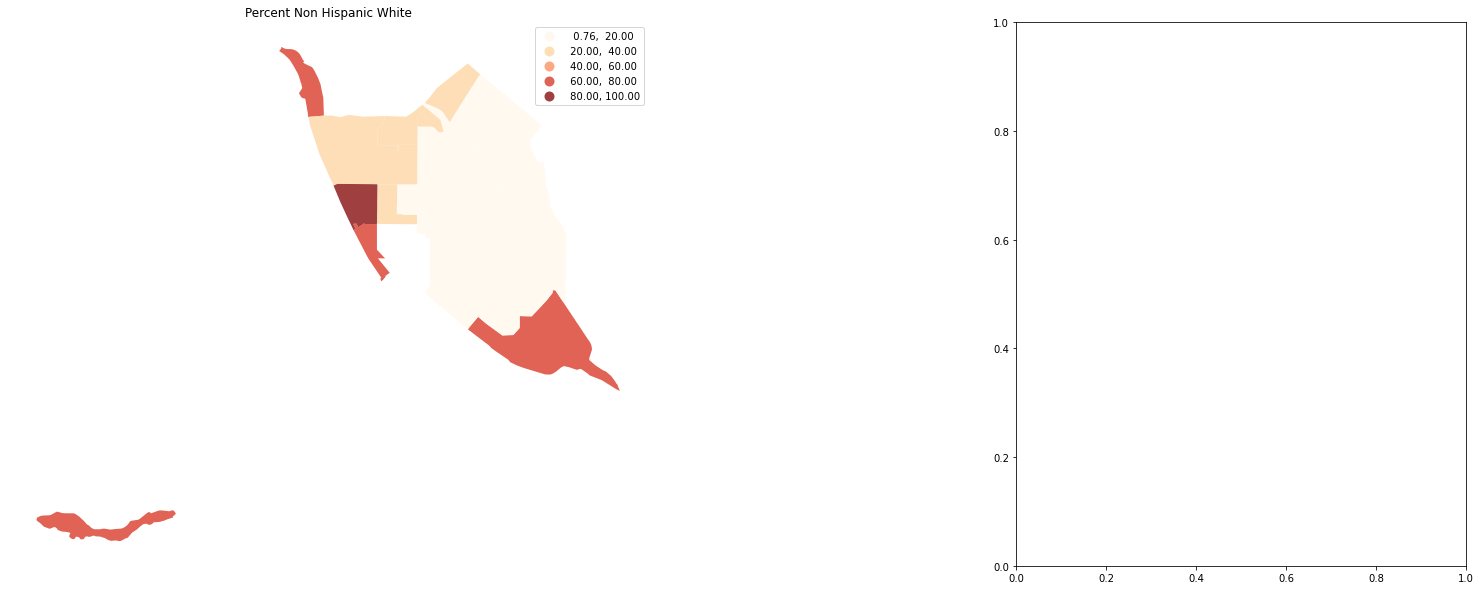

In [19]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(30, 10))

# name each subplot
ax1, ax2 = axs

# percent hispanic map on the left
gdfox.plot(column='Percent Non Hispanic White', 
            cmap='OrRd', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Non Hispanic White")

# percent black map on the right
gdfma.plot(column='Percent Non-Hispanic Non-White', 
            cmap='OrRd', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Non-Hispanic Non-White")

## Mapping the Racial Population Around the TRI Facility with the Largest Releases

In [20]:
#Found census tract that Parker Hannifan Facility is in
#Census Tracts: 
#STATE CODE: 06
#GEOID: 06111004902
#CENTLAT: +34.2084355
#COUNTY CODE: 111
#AREAWATER: 0
#NAME: Census Tract 49.02
#CENTLON: -119.1342637
#TRACT CODE: 004902
#AREALAND: 10177889
#source: https://geocoding.geo.census.gov/geocoder/geographies/address?street=2340+Eastman+Ave&city=Oxnard&state=CA&zip=93030&benchmark=4&vintage=4

In [32]:
#locking census tract 49.02/geoid 06111004902 on index 33 in onxard census data table
parker=gdfox.query('index==33')


In [34]:
parker

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races
33,14000US06111004902,"Census Tract 49.02, Ventura, CA",5072.0,106.0,94.0,0.0,0.0,12.0,0.0,0.0,0.0,4966.0,"MULTIPOLYGON (((-119.15976 34.19728, -119.1597...",1.853312,0.0,0.0,0.236593,0.0,0.0,0.0


<AxesSubplot:>

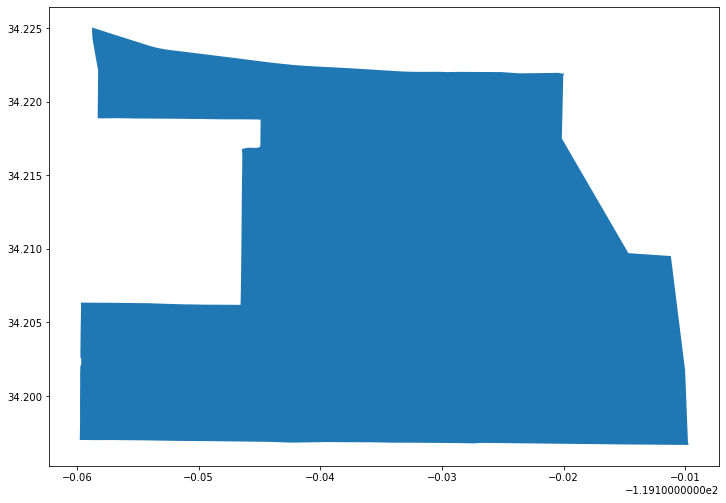

In [35]:
#plot data
parker.plot(figsize=(12,12))

In [36]:
# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

In [42]:
#looking at Oxnard city and driving distance between toxic facilties and nearest residential areas
address = '2340, Eastman Avenue, Oxnard, Ventura County, California, 93030, United States'
network_type = 'drive'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 1609 # googled avergae mph per minute and converted to meters 

In [43]:
%%time
# see how long it takes this cell to run 

# download the street network
G = ox.graph_from_address(address, network_type=network_type, dist = 2000)

CPU times: user 1.37 s, sys: 19.9 ms, total: 1.39 s
Wall time: 4.79 s


In [39]:
#what is graph is this?
type(G)

networkx.classes.multidigraph.MultiDiGraph

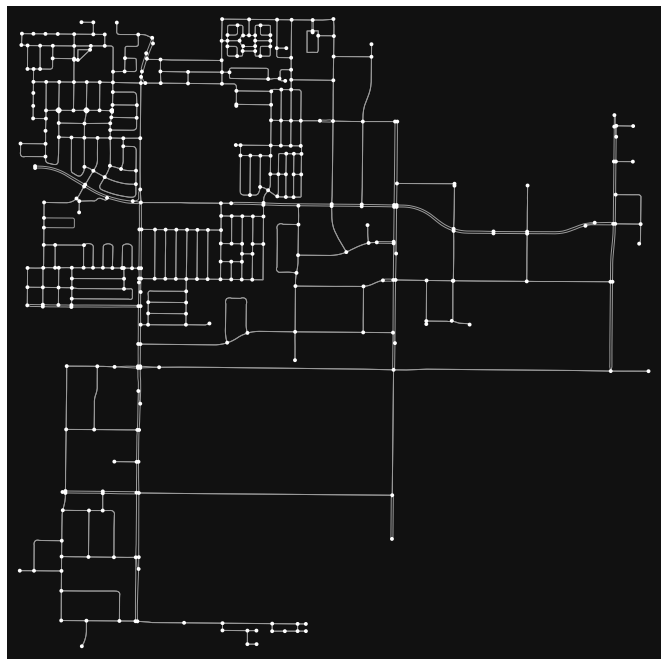

In [44]:
# plot using oxmnx
fig, ax = ox.plot_graph(G,figsize=(12,12))
#shows grid of oxnard

In [45]:
# project our network data to Web Mercator (measurements are in meters)
G = ox.project_graph(G, to_crs='epsg:3857')

In [108]:
# convert nodes and edges to geodataframes
gdfpa_nodes, gdfpa_edges = ox.graph_to_gdfs(G)

In [48]:
gdfpa_nodes.sample(10)

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
95571847,4.057743e+06,-1.326507e+07,3,-119.162161,34.215260,NaN,POINT (-13265071.062 4057742.992)
95559162,4.057645e+06,-1.326475e+07,4,-119.159264,34.214530,NaN,POINT (-13264748.570 4057644.722)
95489480,4.055696e+06,-1.326474e+07,3,-119.159178,34.200053,NaN,POINT (-13264739.018 4055695.992)
7432299926,4.055102e+06,-1.326481e+07,3,-119.159852,34.195643,NaN,POINT (-13264814.003 4055102.438)
95441449,4.057196e+06,-1.326502e+07,3,-119.161711,34.211197,NaN,POINT (-13265021.035 4057196.014)
5247949800,4.056667e+06,-1.326523e+07,4,-119.163576,34.207268,NaN,POINT (-13265228.646 4056667.152)
95630044,4.056239e+06,-1.326299e+07,3,-119.143467,34.204091,NaN,POINT (-13262990.033 4056239.480)
95569526,4.056376e+06,-1.326359e+07,3,-119.148848,34.205103,NaN,POINT (-13263589.088 4056375.709)
95653459,4.057761e+06,-1.326470e+07,3,-119.158847,34.215398,NaN,POINT (-13264702.138 4057761.462)


In [107]:
gdfpa_edges.head()

,osmid,name,oneway,length,geometry,lanes,ref,maxspeed,junction,drive_time
highway,,,,,,,,,,
residential,"[10738055, 10714703]","[Beacon Place, Universe Circle]",False,548.837,"LINESTRING (-13265403.150 4053573.653, -13265358.010 4053573.290, -13265337.260 4053573.115, -13265282.480 4053572.671, -13265225.418 4053572.214, -13265220.252 4053572.173, -13265152.737 4053572.187, -13265131.420 4053572.187, -13265123.672 4053572.187, -13265010.070 4053572.200, -13265000.608 4053572.200, -13264982.363 4053571.366, -13264975.127 4053569.886, -13264967.446 4053566.791, -13264961.435 4053561.677, -13264958.318 4053557.102, -13264956.425 4053551.988, -13264955.869 4053546.471, -13264956.759 4053540.953, -13264957.761 4053520.903, -13264957.906 4053497.017, -13264958.073 4053469.539, -13264958.128 4053460.724, -13264958.206 4053446.649, -13264958.429 4053410.289, -13264958.830 4053343.275)",NaN,NaN,NaN,NaN,0.341104
tertiary,10739932,Pacific Avenue,False,187.589,"LINESTRING (-13265403.150 4053573.653, -13265403.507 4053490.787, -13265403.907 4053397.344, -13265404.119 4053346.639)",NaN,NaN,NaN,NaN,0.116587
tertiary,10739932,Pacific Avenue,False,125.875,"LINESTRING (-13265403.150 4053573.653, -13265402.694 4053642.795, -13265402.482 4053675.697, -13265402.315 4053701.359, -13265402.149 4053725.986)",NaN,NaN,NaN,NaN,0.078232
residential,"[10714703, 10738055]","[Universe Circle, Beacon Place]",False,548.837,"LINESTRING (-13264958.830 4053343.275, -13264958.429 4053410.289, -13264958.206 4053446.649, -13264958.128 4053460.724, -13264958.073 4053469.539, -13264957.906 4053497.017, -13264957.761 4053520.903, -13264956.759 4053540.953, -13264955.869 4053546.471, -13264956.425 4053551.988, -13264958.318 4053557.102, -13264961.435 4053561.677, -13264967.446 4053566.791, -13264975.127 4053569.886, -13264982.363 4053571.366, -13265000.608 4053572.200, -13265010.070 4053572.200, -13265123.672 4053572.187, -13265131.420 4053572.187, -13265152.737 4053572.187, -13265220.252 4053572.173, -13265225.418 4053572.214, -13265282.480 4053572.671, -13265337.260 4053573.115, -13265358.010 4053573.290, -13265403.150 4053573.653)",NaN,NaN,NaN,NaN,0.341104
tertiary,743170077,Emerson Avenue,False,101.574,"LINESTRING (-13264958.830 4053343.275, -13264947.253 4053343.181, -13264845.551 4053342.320, -13264835.966 4053341.297)",NaN,NaN,NaN,NaN,0.063129


<AxesSubplot:>

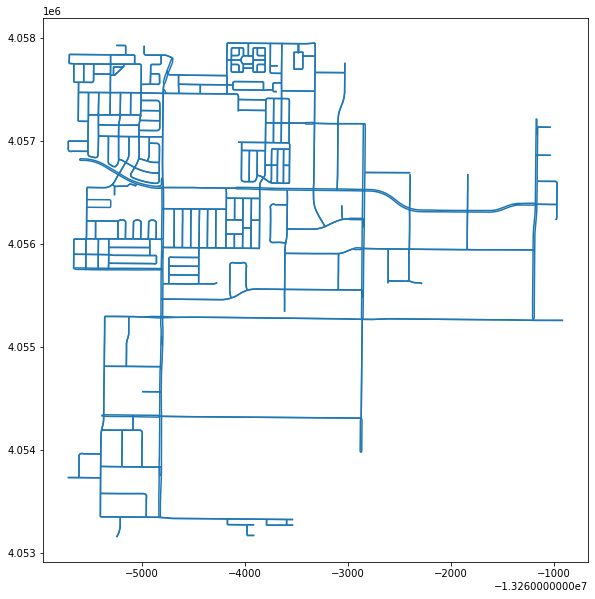

In [113]:

#query only residential roads
#gdfpa_edges=gdfpa_edges.query('highway==residential')
#gdfpa_edges.loc[gdfpa_edges['highway'] == residential]
#Select rows whose column value contains a string

gdfpa_edges.loc[gdfpa_edges['highway'].str.contains('residential')]
gdfpa_edges.plot(figsize=(10,10))

In [114]:
# get the bounding box coordinates
minx, miny, maxx, maxy = gdfpa_nodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13265721.190172315
4053149.7311939765
-13260910.874600055
4057948.5014720145


In [115]:
# calculate the centroid
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-13263316.032386184
4055549.1163329957


In [116]:
# use osmnx's distance.nearest_nodes command to get the id for the nearest node
center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x)
print('The id for the nearest node is ' + str(center_node))

The id for the nearest node is 95565605


In [117]:
# what is this record?
gdf_nodes.loc[[center_node]]

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
95565605,4.055551e+06,-1.326309e+07,3,-119.144398,34.198973,NaN,POINT (-13263093.716 4055550.633)


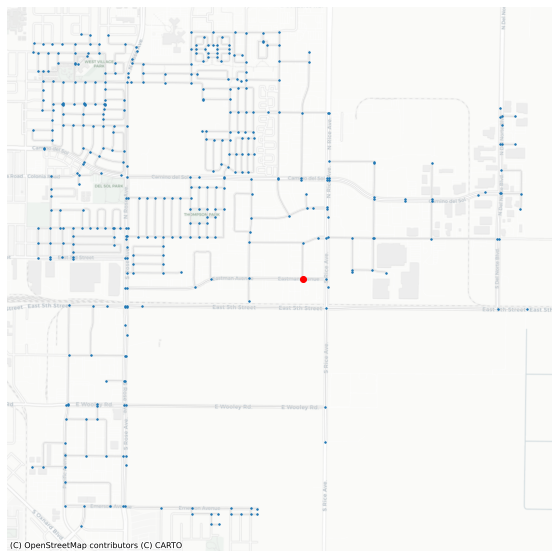

In [118]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdfpa_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gainsboro', 
               zorder=10)

# add all nodes to ax
gdfpa_nodes.plot(ax=ax, 
               markersize=2, 
               zorder=20)

# add the center node in red also to ax
gdfpa_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [119]:
# a quick look at the data
gdfpa_edges[['osmid','name','highway','length']].sample(5)

,,,osmid,name,highway,length
u,v,key,,,,
95505742,95531249,0,10734536,Sara Drive,residential,101.608
95505831,95563040,0,10736221,Spectrum Circle,residential,125.745
95478409,95452234,0,10731387,Williams Drive,residential,75.720
95462456,95462458,0,10730407,Campton Drive,residential,59.601
95412539,95412548,0,"[10727746, 10727747]",Torena Way,residential,95.818


In [120]:
# create a new column, calculate the time it takes to travel that edge
gdfpa_edges['drive_time'] = gdfpa_edges['length']/meters_per_minute

In [121]:
gdfpa_edges[['osmid','name','highway','length','drive_time']].sample(10)

,,,osmid,name,highway,length,drive_time
u,v,key,,,,,
95494363,95518771,0,10742687,Flora Lane,residential,36.029,0.022392
95588531,3216703666,0,315547684,NaN,residential,12.250,0.007613
95614833,95494363,0,10742687,Flora Lane,residential,35.472,0.022046
95673644,95499229,0,10742930,Montevina Circle,residential,342.762,0.213028
374104337,95449269,0,209414685,East 5th Street,secondary,1481.980,0.921057
7432299893,7432299926,0,794628230,NaN,secondary_link,83.182,0.051698
95441449,3216703662,0,315547680,Teresa Street,residential,35.461,0.022039
95568268,95462461,0,"[889486800, 724309682, 889486797]",East 3rd Street,tertiary,424.764,0.263993
95585754,95585751,0,10737535,Nidia Way,residential,153.891,0.095644


In [122]:
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='plasma', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[20, 15, 10, 5]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


In [123]:
# reverse the sort order so that the darker color matches longer times
trip_times.sort(reverse=True)
print(trip_times)
print(iso_colors)

[20, 15, 10, 5]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


In [124]:
# create a list of "zipped" time/colors
time_color = list(zip(trip_times, iso_colors))
time_color

[(20, '#0d0887'), (15, '#9c179e'), (10, '#ed7953'), (5, '#f0f921')]

In [125]:
# loop through the list of time/colors
for time,color in list(time_color):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 20 minutes is #0d0887
The color for 15 minutes is #9c179e
The color for 10 minutes is #ed7953
The color for 5 minutes is #f0f921


In [128]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, center_node, radius=time, distance='time')

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdfpa_nodes.loc[node,'time'] = str(time) + ' mins'
        gdfpa_nodes.loc[node,'color'] = color

There are 389 nodes within 20 minutes 
There are 300 nodes within 15 minutes 
There are 165 nodes within 10 minutes 
There are 36 nodes within 5 minutes 


In [129]:
# spot check
gdfpa_nodes[['highway','time','color']].sample(20)

,highway,time,color
osmid,,,
95525353,NaN,10 mins,#ed7953
95657199,NaN,20 mins,#0d0887
7432299912,traffic_signals,10 mins,#ed7953
95517653,NaN,10 mins,#ed7953
897648486,NaN,5 mins,#f0f921
95584840,NaN,10 mins,#ed7953
2005492997,NaN,15 mins,#9c179e
95569557,NaN,10 mins,#ed7953
898031413,NaN,15 mins,#9c179e


In [130]:
# the NaN values then need to be populated with a valid color
gdfpa_nodes['color'].fillna('#cccccc', inplace=True)
# another spot check: are all values in the color column populated?
gdfpa_nodes.sample(10)

,y,x,street_count,lon,lat,highway,geometry,time,color
osmid,,,,,,,,,
95436523,4.056092e+06,-1.326410e+07,3,-119.153465,34.202996,NaN,POINT (-13264103.050 4056092.108),15 mins,#9c179e
95501813,4.057171e+06,-1.326365e+07,4,-119.149362,34.211009,NaN,POINT (-13263646.306 4057170.693),15 mins,#9c179e
3216701738,4.057045e+06,-1.326542e+07,3,-119.165316,34.210072,NaN,POINT (-13265422.320 4057044.537),20 mins,#0d0887
95478411,4.057453e+06,-1.326417e+07,3,-119.154107,34.213107,stop,POINT (-13264174.539 4057453.083),15 mins,#9c179e
7273437977,4.054337e+06,-1.326537e+07,4,-119.164863,34.189958,traffic_signals,POINT (-13265371.825 4054337.394),10 mins,#ed7953
95449269,4.055264e+06,-1.326286e+07,5,-119.142311,34.196846,traffic_signals,POINT (-13262861.426 4055264.360),5 mins,#f0f921
95536645,4.053326e+06,-1.326417e+07,3,-119.154067,34.182444,NaN,POINT (-13264170.064 4053326.185),10 mins,#ed7953
95563186,4.056605e+06,-1.326116e+07,3,-119.127048,34.206805,NaN,POINT (-13261162.334 4056604.763),10 mins,#ed7953
95539115,4.056983e+06,-1.326403e+07,3,-119.152827,34.209616,NaN,POINT (-13264032.028 4056983.182),15 mins,#9c179e


<AxesSubplot:>

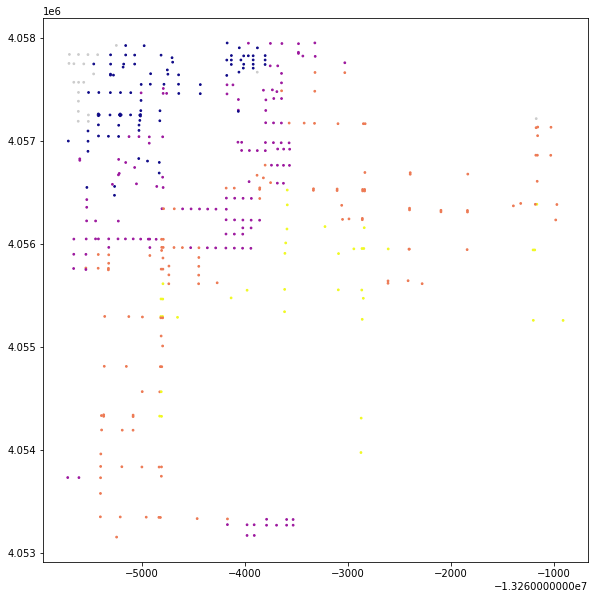

In [131]:

#map it
gdfpa_nodes.plot(figsize=(10,10),
               color=gdfpa_nodes['color'],
               markersize=3)




In [132]:
# show only the points within 5 minutes
gdfpa_nodes[gdfpa_nodes['time']=='5 mins']

,y,x,street_count,lon,lat,highway,geometry,time,color
osmid,,,,,,,,,
95427040,4.054324e+06,-1.326483e+07,5,-119.159980,34.189861,traffic_signals,POINT (-13264828.252 4054324.354),5 mins,#f0f921
897648871,4.054322e+06,-1.326481e+07,4,-119.159817,34.189846,traffic_signals,POINT (-13264810.196 4054322.321),5 mins,#f0f921
95441057,4.055905e+06,-1.326361e+07,3,-119.149055,34.201606,NaN,POINT (-13263612.131 4055905.058),5 mins,#f0f921
95441061,4.055903e+06,-1.326309e+07,3,-119.144378,34.201588,NaN,POINT (-13263091.468 4055902.582),5 mins,#f0f921
95569532,4.056006e+06,-1.326360e+07,3,-119.148984,34.202357,NaN,POINT (-13263604.272 4056006.100),5 mins,#f0f921
95565607,4.055555e+06,-1.326361e+07,4,-119.149077,34.199006,NaN,POINT (-13263614.580 4055555.074),5 mins,#f0f921
95441072,4.055949e+06,-1.326294e+07,2,-119.143042,34.201931,NaN,POINT (-13262942.767 4055948.708),5 mins,#f0f921
95565605,4.055551e+06,-1.326309e+07,3,-119.144398,34.198973,NaN,POINT (-13263093.716 4055550.633),5 mins,#f0f921
4723364108,4.055952e+06,-1.326286e+07,4,-119.142329,34.201953,traffic_signals,POINT (-13262863.352 4055951.723),5 mins,#f0f921


In [77]:
# put it in a variable
gdfpa_5 = gdfpa_nodes[gdfpa_nodes['time']=='5 mins']

<AxesSubplot:>

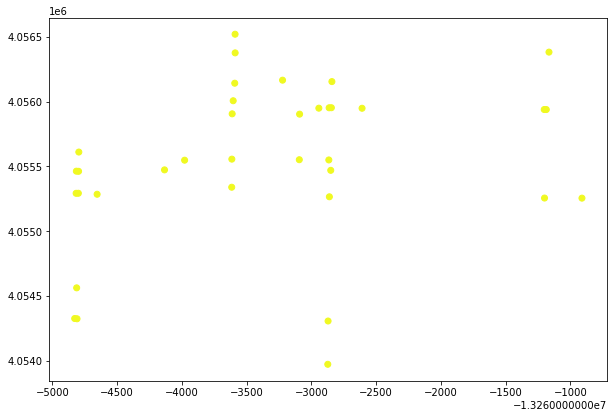

In [133]:
# plot it
gdfpa_5.plot(figsize=(10,10),color=gdfpa_5.color)

In [134]:
# dissolve the nodes by time
isochrones = gdfpa_nodes.dissolve("time")
isochrones

,geometry,y,x,street_count,lon,lat,highway,color
time,,,,,,,,
10 mins,"MULTIPOINT (-13265544.983 4055762.738, -13265425.514 4055760.449, -13265424.524 4055893.846, -13265404.119 4053346.639, -13265403.150 4053573.653, -13265402.149 4053725.986, -13265401.369 4053835.930, -13265399.922 4053957.045, -13265394.134 4054329.817, -13265392.130 4054189.858, -13265371.992 4054322.416, -13265371.825 4054337.394, -13265366.304 4054808.384, -13265362.073 4055292.623, -13265326.340 4055744.931, -13265325.817 4055759.575, -13265323.446 4055808.782, -13265323.000 4055890.751, -13265246.413 4053149.731, -13265211.180 4053345.253, -13265195.651 4053832.835, -13265191.755 4054188.109, -13265151.936 4054807.294, -13265127.969 4055291.008, -13265086.669 4054187.839, -13265086.246 4054319.791, -13265086.179 4054334.339, -13265000.842 4053830.547, -13264997.602 4054562.194, -13264995.866 4055287.078, -13264958.830 4053343.275, -13264923.697 4055884.021, -13264835.966 4053341.297, -13264833.885 4053829.968, -13264827.228 4054560.216, -13264821.662 4054804.858, -13264821.194 4053340.463, -13264817.332 4055278.976, -13264814.003 4055102.438, -13264813.480 4055751.795, -13264811.910 4053740.762, -13264810.764 4053831.220, -13264809.884 4056041.674, -13264809.261 4055933.081, -13264808.270 4055963.217, -13264808.092 4054804.319, -13264799.520 4055005.469, -13264799.420 4055278.882, -13264797.005 4055751.660, -13264796.515 4055859.767, -13264794.044 4055962.531, -13264793.064 4056041.674, -13264790.147 4056338.600, -13264739.686 4055609.584, -13264739.018 4055695.992, -13264738.350 4055781.594, -13264689.147 4055961.683, -13264686.476 4056337.617, -13264607.661 4055960.875, -13264464.104 4053329.146, -13264450.033 4055609.718, -13264449.365 4055693.570, -13264448.586 4055779.037, -13264447.918 4055864.774, -13264447.139 4055959.260, -13264269.951 4055618.965, -13264182.499 4056538.821, -13264170.064 4053326.185, -13264103.807 4056538.619, -13263882.749 4056663.356, -13263857.379 4056526.424, -13263856.700 4056437.626, -13263856.388 4056541.311, -13263821.189 4056638.051, -13263804.157 4056761.753, -13263751.280 4056591.477, -13263644.380 4057483.547, -13263570.943 4057170.343, -13263425.103 4057170.047, -13263335.458 4056517.042, -13263334.745 4056532.198, -13263324.704 4057167.543, -13263322.144 4057479.360, -13263319.917 4057661.495, -13263105.405 4056514.700, -13263104.937 4056529.964, -13263096.722 4057163.963, -13263060.654 4056371.523, -13263052.573 4056234.850, -13263030.709 4057659.610, -13262990.033 4056239.480, -13262860.658 4056231.660, -13262860.335 4056244.514, -13262857.441 4056525.562, -13262857.240 4056511.052, -13262850.227 4057164.003, -13262838.338 4056510.729, -13262838.193 4056525.427, -13262835.455 4056690.170, -13262832.973 4057163.788, -13262610.946 4055614.550, -13262610.812 4055637.498, -13262416.003 4055639.329, -13262407.688 4055945.935, -13262404.137 4055945.908, -13262402.010 4056327.011, -13262402.010 4056343.297, -13262395.409 4056673.182, -13262395.175 4056688.285, -13262279.503 4055610.378, -13262096.950 4056308.153, -13262096.872 4056322.986, -13261842.641 4055941.130, -13261839.647 4056321.371, -13261839.446 4056306.255, -13261836.207 4056674.663, -13261393.612 4056366.206, -13261322.512 4056389.735, -13261180.490 4056381.268, -13261175.726 4056858.185, -13261172.932 4057125.141, -13261162.334 4056604.763, -13261160.408 4056857.943, -13261158.271 4057047.485, -13261157.325 4057131.495, -13261030.743 4056857.297, -13261028.439 4057129.449, -13260982.431 4056229.399, -13260971.188 4056379.209)",4.053574e+06,-1.326540e+07,3,-119.165144,34.184283,traffic_signals,#ed7953
15 mins,"MULTIPOINT (-13265721.190 4053727.870, -13265663.716 4055757.798, -13265662.458 4055896.256, -13265661.768 4056043.639, -13265612.320 4053727.466, -13265604.227 4056822.958, -13265603.937 4056808.300, -13265544.827 4055747.932, -13265544.493 4055895.367, -13265541.710 4056044.689, -13265537.591 4056220.205, -13265536.600 4056352.275, -13265536.044

In [135]:
# for each row, create a convex hull
isochrones = isochrones.convex_hull.reset_index()
isochrones

,time,0
0,10 mins,"POLYGON ((-13265246.413 4053149.731, -13265404.119 4053346.639, -13265544.983 4055762.738, -13265424.524 4055893.846, -13263644.380 4057483.547, -13263319.917 4057661.495, -13263030.709 4057659.610, -13261028.439 4057129.449, -13260971.188 4056379.209, -13260982.431 4056229.399, -13264170.064 4053326.185, -13265246.413 4053149.731))"
1,15 mins,"POLYGON ((-13263979.819 4053165.650, -13265721.190 4053727.870, -13265661.768 4056043.639, -13265604.227 4056822.958, -13265008.545 4057463.449, -13263966.684 4057945.674, -13263321.476 4057948.501, -13263030.509 4057755.754, -13263532.126 4053265.429, -13263909.566 4053165.785, -13263979.819 4053165.650))"
2,20 mins,"POLYGON ((-13265267.151 4056468.827, -13265535.153 4056545.201, -13265715.402 4056995.566, -13265468.384 4057743.921, -13265158.370 4057923.072, -13264172.959 4057947.828, -13263879.187 4057900.442, -13263803.823 4057825.325, -13263804.491 4057738.900, -13264064.645 4057283.700, -13264832.861 4056685.028, -13265267.151 4056468.827))"
3,5 mins,"POLYGON ((-13262873.738 4053970.785, -13264828.252 4054324.354, -13264815.306 4055462.179, -13264796.348 4055609.826, -13263589.611 4056519.855, -13261165.562 4056381.564, -13260910.875 4055253.875, -13262873.738 4053970.785))"


In [136]:
# geometry header has been automatically named "0"
# let's rename that
isochrones.columns=['time','geometry']

In [137]:
isochrones.head()

,time,geometry
0,10 mins,"POLYGON ((-13265246.413 4053149.731, -13265404.119 4053346.639, -13265544.983 4055762.738, -13265424.524 4055893.846, -13263644.380 4057483.547, -13263319.917 4057661.495, -13263030.709 4057659.610, -13261028.439 4057129.449, -13260971.188 4056379.209, -13260982.431 4056229.399, -13264170.064 4053326.185, -13265246.413 4053149.731))"
1,15 mins,"POLYGON ((-13263979.819 4053165.650, -13265721.190 4053727.870, -13265661.768 4056043.639, -13265604.227 4056822.958, -13265008.545 4057463.449, -13263966.684 4057945.674, -13263321.476 4057948.501, -13263030.509 4057755.754, -13263532.126 4053265.429, -13263909.566 4053165.785, -13263979.819 4053165.650))"
2,20 mins,"POLYGON ((-13265267.151 4056468.827, -13265535.153 4056545.201, -13265715.402 4056995.566, -13265468.384 4057743.921, -13265158.370 4057923.072, -13264172.959 4057947.828, -13263879.187 4057900.442, -13263803.823 4057825.325, -13263804.491 4057738.900, -13264064.645 4057283.700, -13264832.861 4056685.028, -13265267.151 4056468.827))"
3,5 mins,"POLYGON ((-13262873.738 4053970.785, -13264828.252 4054324.354, -13264815.306 4055462.179, -13264796.348 4055609.826, -13263589.611 4056519.855, -13261165.562 4056381.564, -13260910.875 4055253.875, -13262873.738 4053970.785))"


<AxesSubplot:>

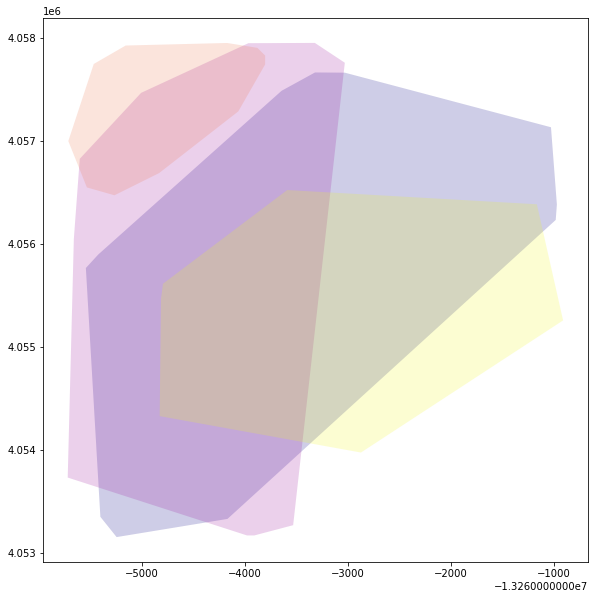

In [138]:
isochrones.plot(figsize=(10,10),alpha=0.2,cmap='plasma')

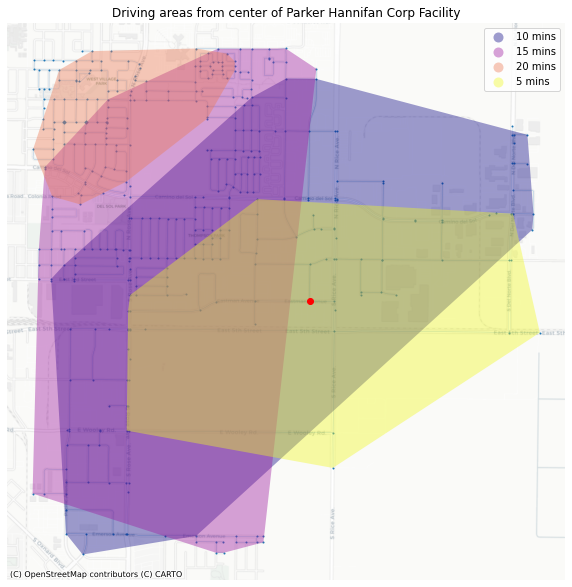

In [139]:
# set up the subplots
fig, ax = plt.subplots(figsize=(10,15))

# add the isochrones
isochrones.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

# add the center node in red
gdfpa_nodes.loc[[center_node]].plot(ax=ax,color='r', zorder=30)

# add all nodes
gdfpa_nodes.plot(ax=ax, 
               markersize=1, 
               zorder=10)

# add the edges
gdfpa_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Driving areas from center of Parker Hannifan Corp Facility')

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [87]:
#mapped parker hannifan and nodes and edges within driving distance
#residential areas needs to come next